In [152]:
import  pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
STUD = pd.read_csv('C:/Skillfactory_rds/HuanMangustina/UNIT_2/stud_math.csv')

# 1 Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [3]:
STUD.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

# 2.2. Первичный отсмотр данных

In [6]:
display(STUD.head(10))
STUD.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 2.3. Первичный анализ данных в столбцах. Часть I

In [7]:
STUD.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

# #school

2


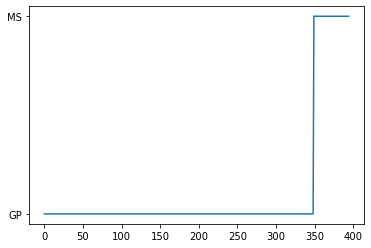

In [8]:
import matplotlib.pyplot as plt
print(STUD.school.nunique())
plt.plot(STUD.school)
#в анализе присутствуют данные из двух школ GP и MS 

Здесь всего 2 значения (2 школы), пустых ячеек нет. эти данные могут нам помочь в дальнейшем.

# #sex

In [9]:
len(STUD.sex)
pd.DataFrame(STUD.sex.value_counts())

,sex
F,208
M,187


Пустых ячеека нет, девочек 208 и мальчиков 187 .

# #age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

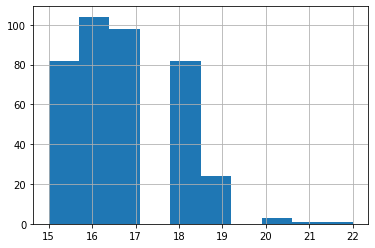

In [10]:
STUD.age.hist()
STUD.age.describe()

Числовой, нет пропусков, похоже содержит вбросы.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


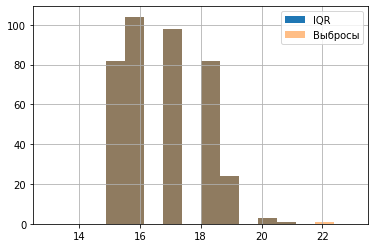

In [16]:
IQR = STUD.age.quantile(0.75) - STUD.age.quantile(0.25)
perc25 = STUD.age.quantile(0.25)
perc75 = STUD.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

STUD.age.loc[STUD.age.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(13, 23), label='IQR')

STUD.age.loc[STUD.age <= 23].hist(
alpha = 0.5, bins = 16, range = (13, 23), label = 'Выбросы')
 

plt.legend()

выброс 22 года подтвердился

# 2.4. Первичный анализ данных в столбцах. Часть II

ДАлее идут несколько номинативных переменных. 'address', 'famsize', 'Pstatus', 

# #address

In [23]:
len(STUD.address)
STUD.address.value_counts()

U    295
R     83
Name: address, dtype: int64

в основном городские жители 

# #famsize

In [25]:
len(STUD.famsize)
STUD.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

# #Pstatus

In [26]:
len(STUD.Pstatus)
STUD.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

# #Medu

In [27]:
len(STUD.Medu)
STUD.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

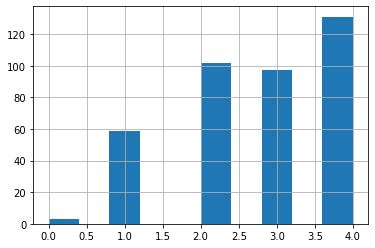

In [28]:
STUD.Medu.hist()
STUD.Medu.describe()

образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее. ДАнные полные 

# #Fedu

In [29]:
len(STUD.Fedu)
STUD.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

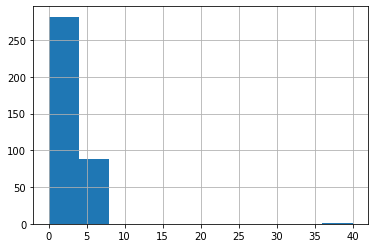

In [31]:
STUD.Fedu.hist()
STUD.Fedu.describe()

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)/ очевидно .данные по образованию отцов не полные, значение 40 выброс по здравому смыслу, вероятно это опечатка 4.0. и, скорее всего, значение 0 это выбросы. по здравому смыслу

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


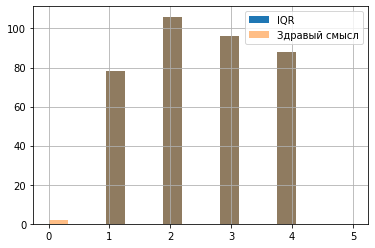

In [40]:
IQR = STUD.Fedu.quantile(0.75) - STUD.Fedu.quantile(0.25)
perc25 = STUD.Fedu.quantile(0.25)
perc75 = STUD.Fedu.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

STUD.Fedu.loc[STUD.Fedu.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 5), label='IQR')

STUD.Fedu.loc[STUD.Fedu <= 5].hist(
    alpha=0.5, bins=16, range=(0, 5), label='Здравый смысл')


plt.legend()

значения 0 и 40 выбросы

# #Mjob

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

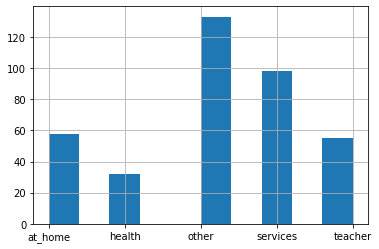

In [41]:
STUD.Mjob.hist()
STUD.Mjob.describe()

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

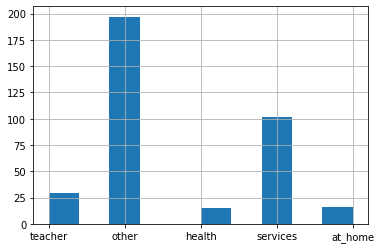

In [42]:
STUD.Fjob.hist()
STUD.Fjob.describe()

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
есть существенные пропуски данных 395-359=36  395-376=19. 10% и 5% соответсвеннно... довольно много, но существенно повлять на распределение не смогут.

# # reason
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

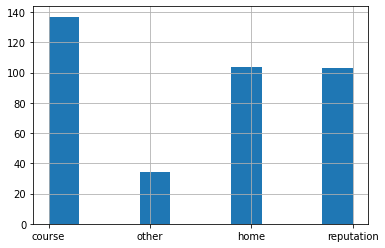

In [45]:
STUD.reason.hist()
STUD.reason.describe()

пропуски данных менее 5%. основная причина выбора школы - образовательная программа

# #guardian

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

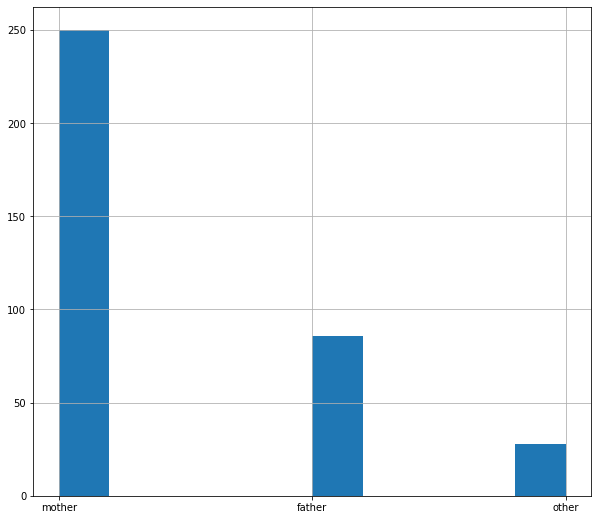

In [121]:
STUD.guardian.hist()
STUD.guardian.describe()

опекун ('mother' - мать, 'father' - отец, 'other' - другое)/в основном опекунами являются матери, есть так же незначителные пропуски данных.


# #traveltime, studytime, failures
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

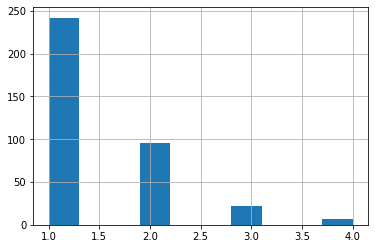

In [48]:
STUD.traveltime.hist()
STUD.traveltime.describe()

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

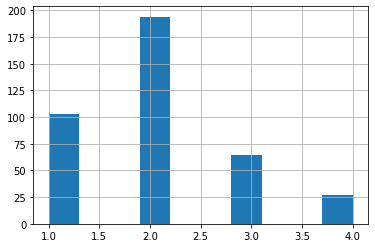

In [49]:
STUD.studytime.hist()
STUD.studytime.describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

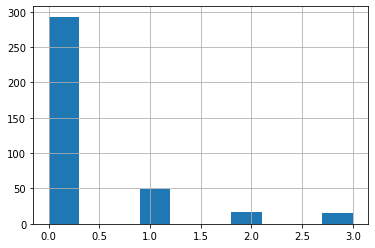

In [50]:
STUD.failures.hist()
STUD.failures.describe()

## schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Группа номинативных данных, с оценкой yes или no


16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

In [51]:
#schoolsup 
print(pd.DataFrame(STUD.schoolsup.value_counts()))
#familysup 
print(pd.DataFrame(STUD.famsup.value_counts()))
#paid — дополнительные платные занятия по математике (yes или no)
print(pd.DataFrame(STUD.paid.value_counts()))
# activities — дополнительные внеучебные занятия (yes или no)
print(pd.DataFrame(STUD.activities.value_counts()))
#20 nursery — посещал детский сад (yes или no)
print(pd.DataFrame(STUD.nursery.value_counts()))
#21 higher — хочет получить высшее образование (yes или no)
print(pd.DataFrame(STUD.higher.value_counts()))
#22 internet — наличие интернета дома (yes или no)
print(pd.DataFrame(STUD.internet.value_counts()))
#23 romantic — в романтических отношениях (yes или no)
print(pd.DataFrame(STUD.romantic.value_counts()))

     schoolsup
no         335
yes         51
     famsup
yes     219
no      137
     paid
no    200
yes   155
     activities
yes         195
no          186
     nursery
yes      300
no        79
     higher
yes     356
no       19
     internet
yes       305
no         56
     romantic
no        240
yes       124


## famrel, freetime, goout, health 
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


array([<AxesSubplot:title={'center':'famrel'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'freetime'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'goout'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'health'}, ylabel='Frequency'>],
      dtype=object)

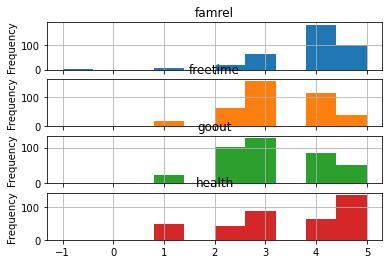

In [84]:
# family_rel

print(STUD.famrel.describe())
# free_time

print(STUD.freetime.describe())
# go_out

print(STUD.goout.describe())
# health

print(STUD.health.describe())
STUD[['famrel', 'freetime', 'goout','health']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['famrel', 'freetime', 'goout','health'], 
                               legend = False)


есть выброс по минимальному значению в famrel/ удалим значение, согласно здравого смысла:

In [85]:
STUD = STUD.loc[STUD.famrel >= 0]
print(STUD.famrel.describe())

count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


## absences
28 absences — количество пропущенных занятий



count    355.000000
mean       7.242254
std       24.040759
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


,absences
0.0,100
2.0,57
4.0,52
6.0,29
8.0,21
10.0,15
12.0,12
14.0,10
3.0,8
16.0,7


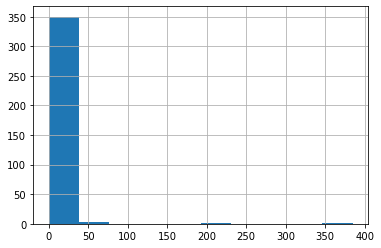

In [88]:
STUD.absences.hist()
print(STUD.absences.describe())
pd.DataFrame(STUD.absences.value_counts())

есть ученик который вообще не ходил, надо проверить на выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


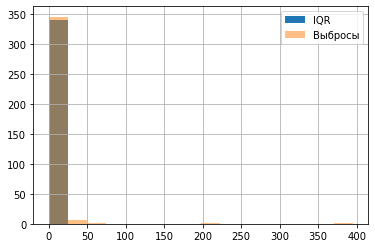

In [94]:
IQR = STUD.absences.quantile(0.75) - STUD.absences.quantile(0.25)
perc25 = STUD.absences.quantile(0.25)
perc75 = STUD.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

STUD.absences.loc[STUD.absences.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 395), label='IQR')

STUD.absences.loc[STUD.absences <= 395].hist(
alpha = 0.5, bins = 16, range = (0, 395), label = 'Выбросы')
 

plt.legend()


можем отбросить учеников пропустивших более 20 занятий 

In [95]:
STUD = STUD.loc[STUD.absences <= 20]
print(STUD.absences.describe())

count    339.000000
mean       4.551622
std        4.848548
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64


## score
29 score — баллы по госэкзамену по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


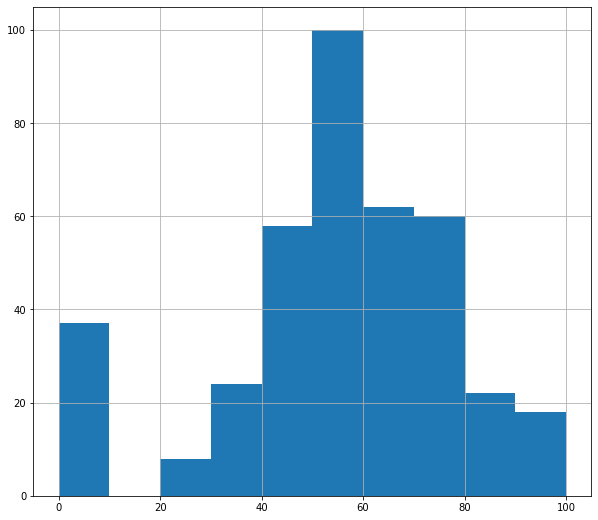

In [153]:
STUD.score.hist()
print(STUD.score.describe())
pd.DataFrame(STUD.score.value_counts())

In [97]:
IQR = STUD.score.quantile(0.75) - STUD.score.quantile(0.25)
perc25 = STUD.score.quantile(0.25)
perc75 = STUD.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,  Границы выбросов: [5.625, 100.625].


можем отбросиь лишние значения , тех кто получили меньше 5 баллов, но лучше оставить для будущей модели

# корреляционный анализ количественных переменных

3 age — возраст ученика (от 15 до 22)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

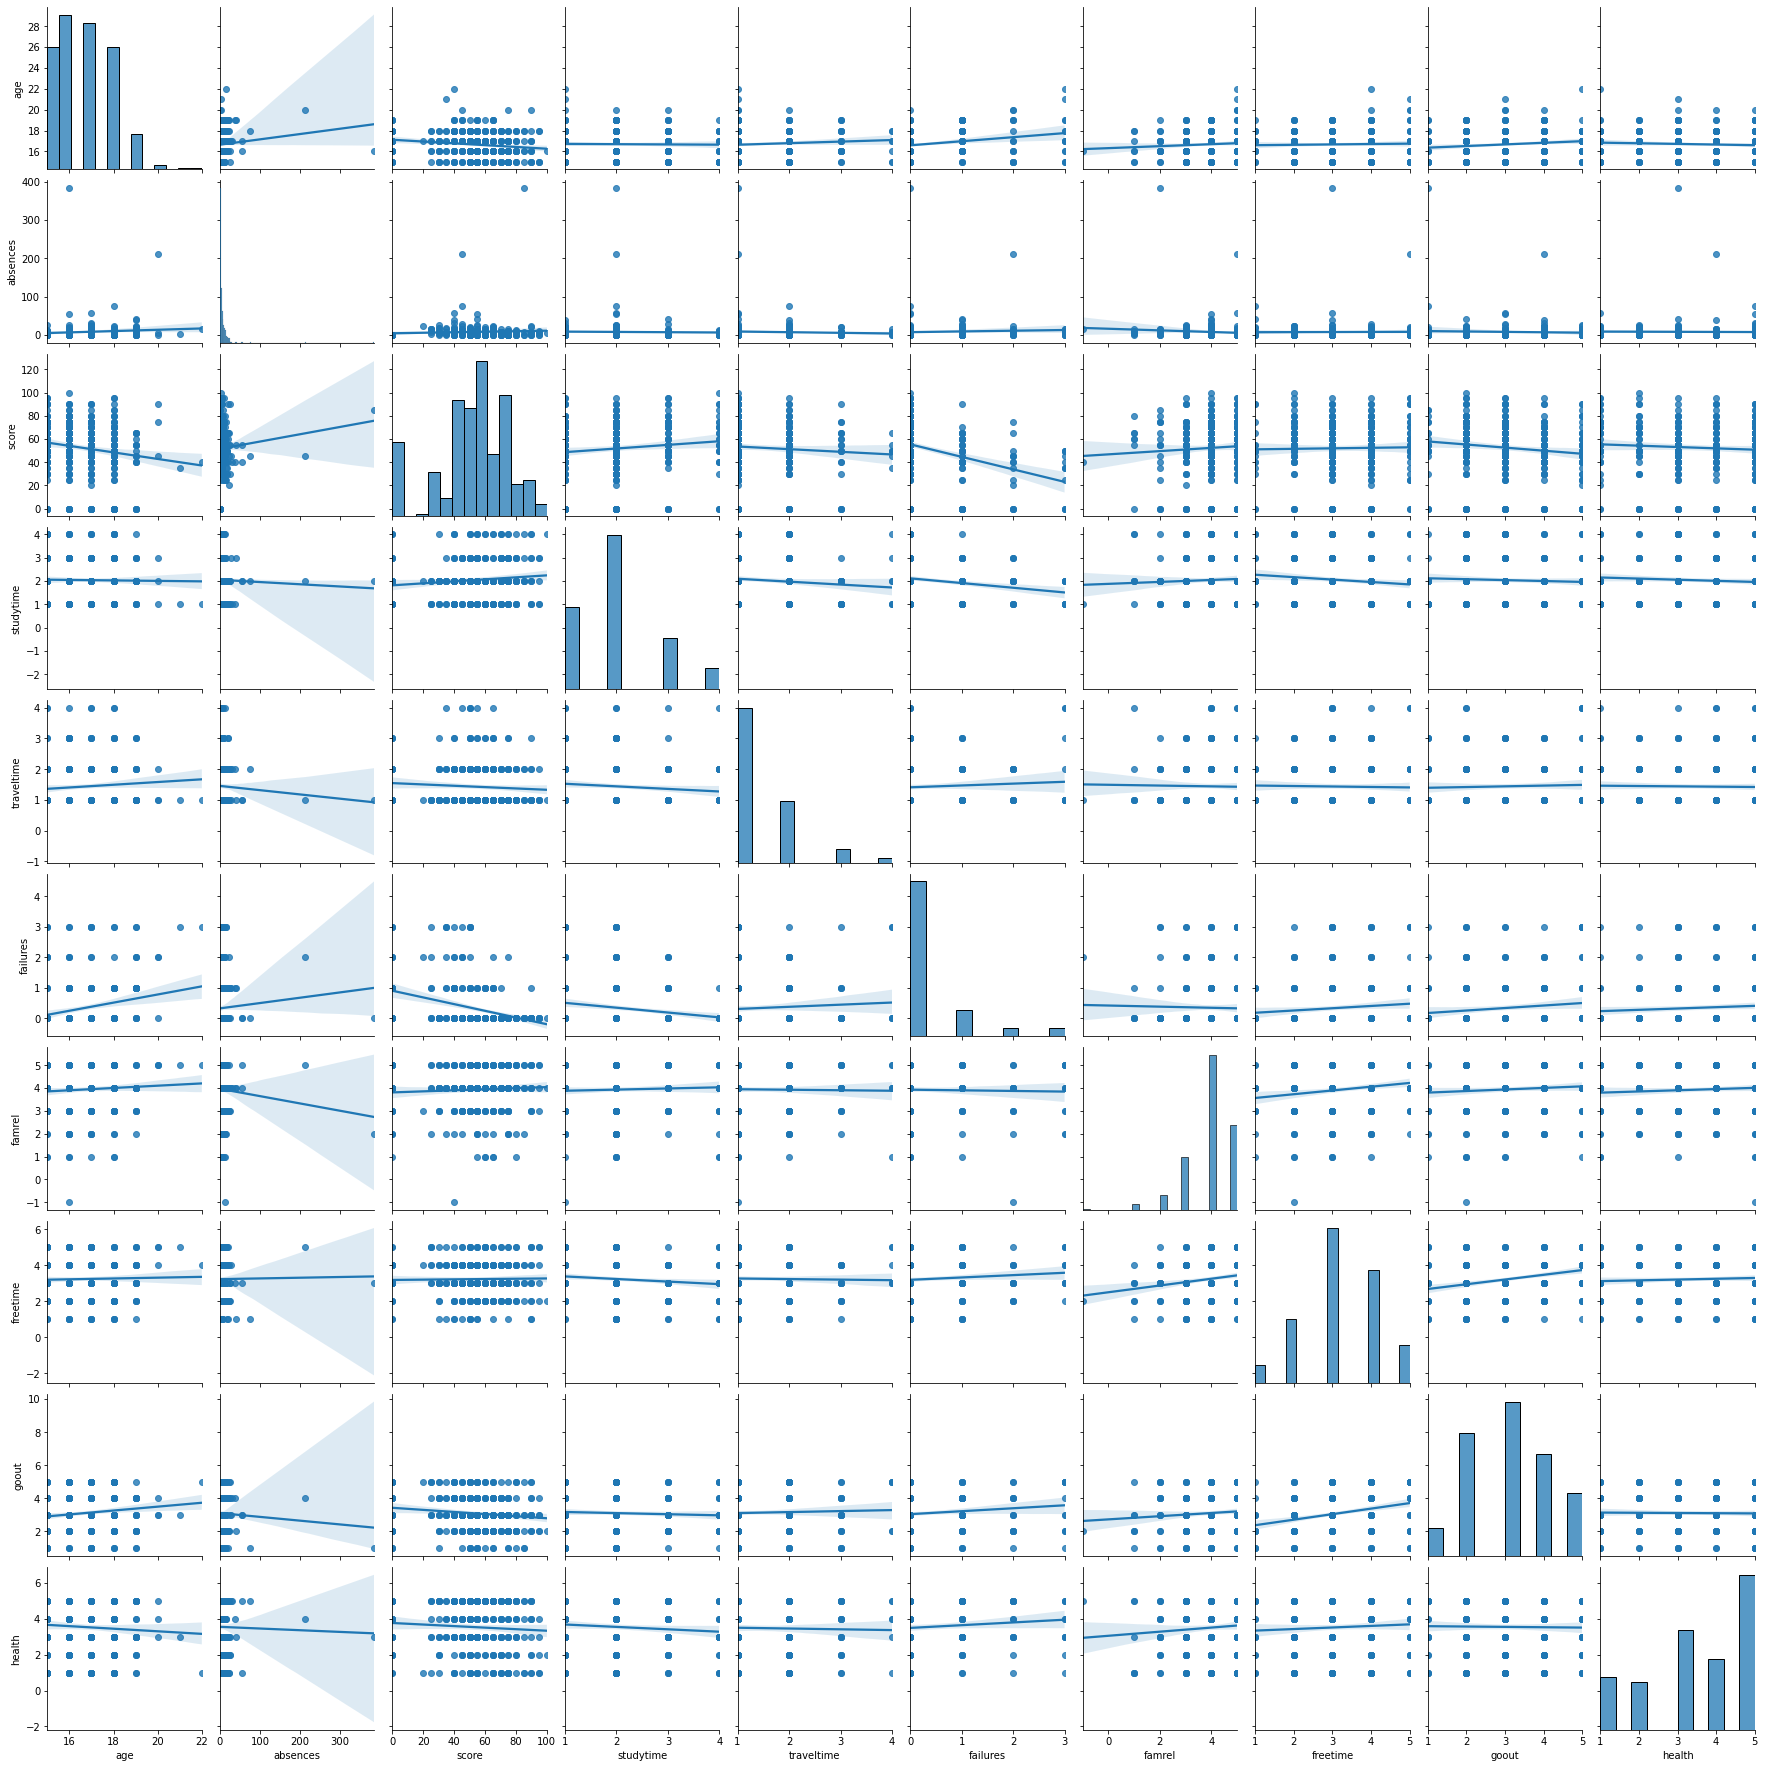

In [170]:
import seaborn as sns
STUD_NUM = ['age','absences','score', 'studytime','traveltime','failures','famrel','freetime','goout','health']
sns.pairplot(STUD[STUD_NUM], kind='reg')

In [171]:
STUD [STUD_NUM].corr()

,age,absences,score,studytime,traveltime,failures,famrel,freetime,goout,health
age,1.000000,0.093592,-0.155726,-0.015556,0.081508,0.228047,0.068899,0.029023,0.135107,-0.065946
absences,0.093592,1.000000,0.065283,-0.026544,-0.048215,0.057391,-0.082609,0.009292,-0.048738,-0.016222
score,-0.155726,0.065283,1.000000,0.115741,-0.070559,-0.344338,0.057112,0.019026,-0.129685,-0.070460
studytime,-0.015556,-0.026544,0.115741,1.000000,-0.102206,-0.178992,0.045894,-0.121969,-0.051280,-0.080016
traveltime,0.081508,-0.048215,-0.070559,-0.102206,1.000000,0.064699,-0.016857,-0.021937,0.037636,-0.021531
failures,0.228047,0.057391,-0.344338,-0.178992,0.064699,1.000000,-0.022655,0.098382,0.120914,0.081284
famrel,0.068899,-0.082609,0.057112,0.045894,-0.016857,-0.022655,1.000000,0.175743,0.081154,0.077474
freetime,0.029023,0.009292,0.019026,-0.121969,-0.021937,0.098382,0.175743,1.000000,0.296437,0.061575
goout,0.135107,-0.048738,-0.129685,-0.051280,0.037636,0.120914,0.081154,0.296437,1.000000,-0.015608
health,-0.065946,-0.016222,-0.070460,-0.080016,-0.021531,0.081284,0.077474,0.061575,-0.015608,1.000000


корреляция от пропусков занятий, времени в пути, отношений в семье,свободного времени  и здоровья - очень слабая . можно принебречь: 

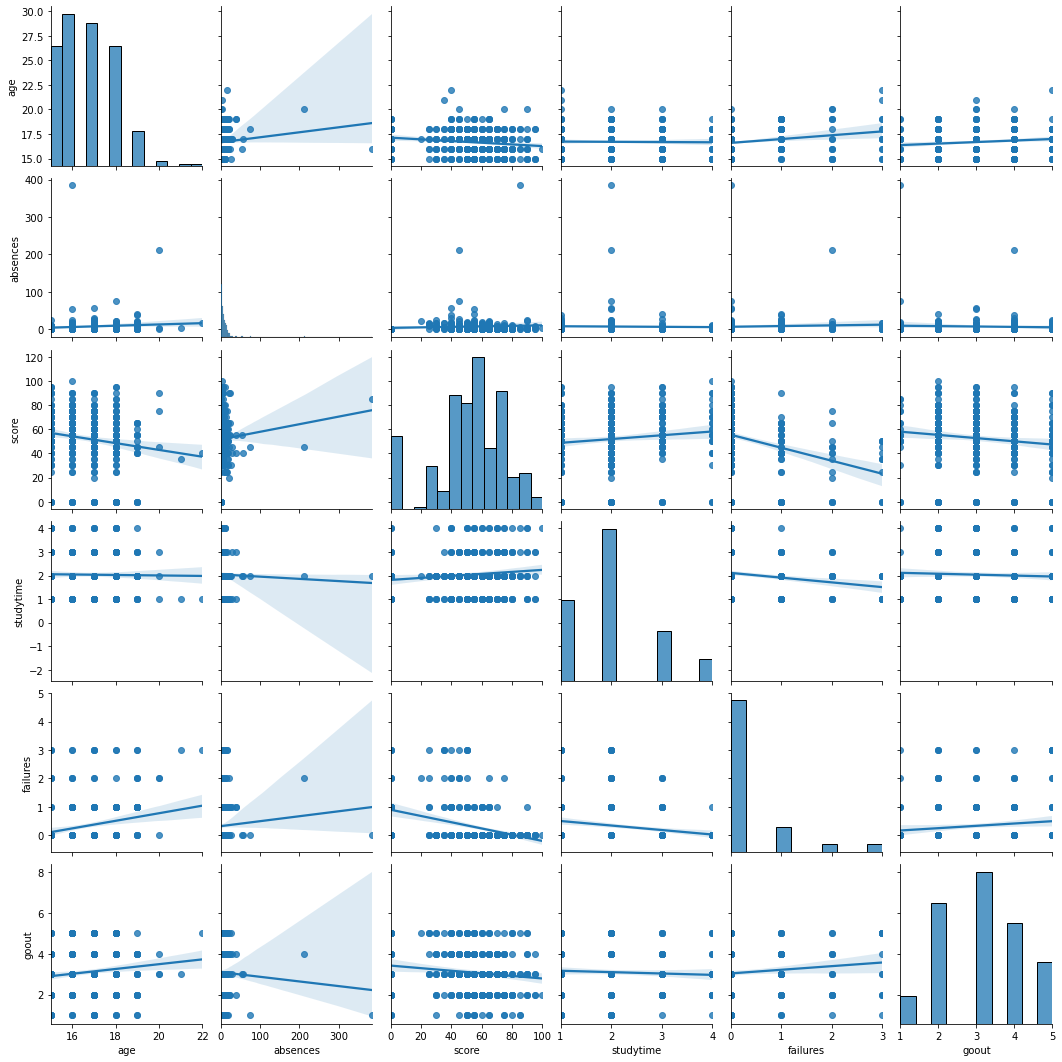

In [172]:
import seaborn as sns
STUD_NUM = ['age','score', 'studytime','failures','goout']
sns.pairplot(STUD[STUD_NUM], kind='reg')

In [173]:
STUD [STUD_NUM].corr()

,age,absences,score,studytime,failures,goout
age,1.000000,0.093592,-0.155726,-0.015556,0.228047,0.135107
absences,0.093592,1.000000,0.065283,-0.026544,0.057391,-0.048738
score,-0.155726,0.065283,1.000000,0.115741,-0.344338,-0.129685
studytime,-0.015556,-0.026544,0.115741,1.000000,-0.178992,-0.051280
failures,0.228047,0.057391,-0.344338,-0.178992,1.000000,0.120914
goout,0.135107,-0.048738,-0.129685,-0.051280,0.120914,1.000000


# Проанализируем номинативные переменные . 

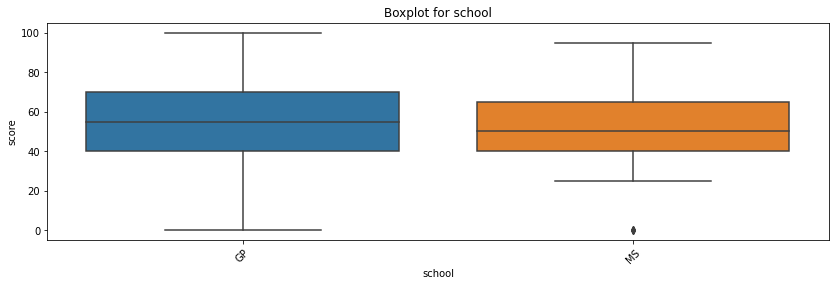

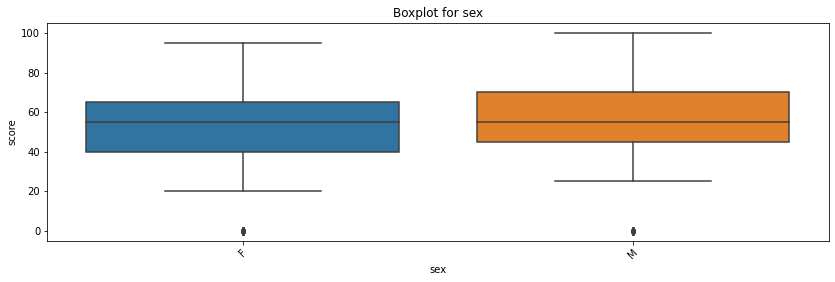

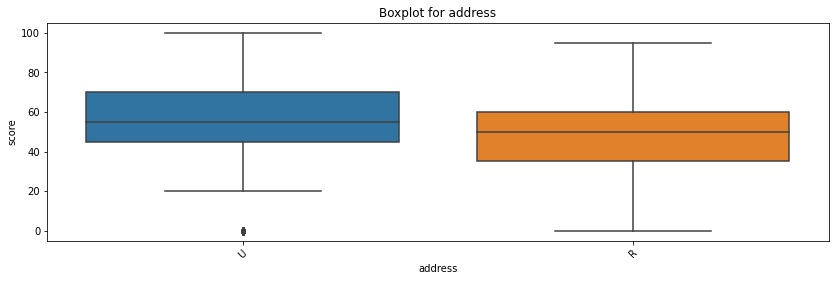

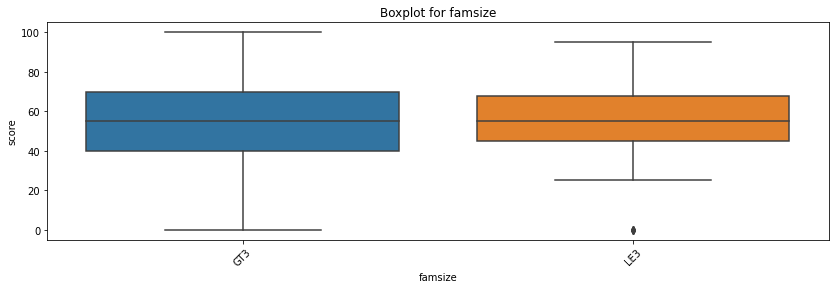

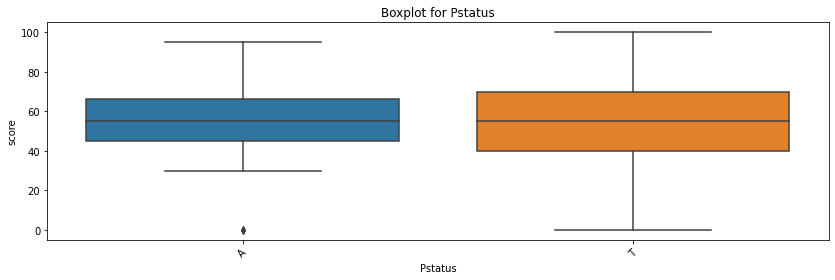

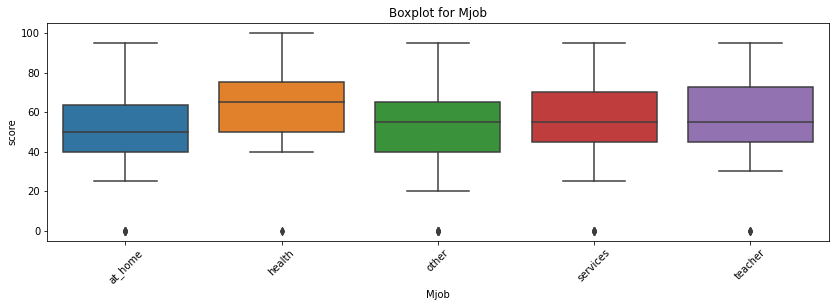

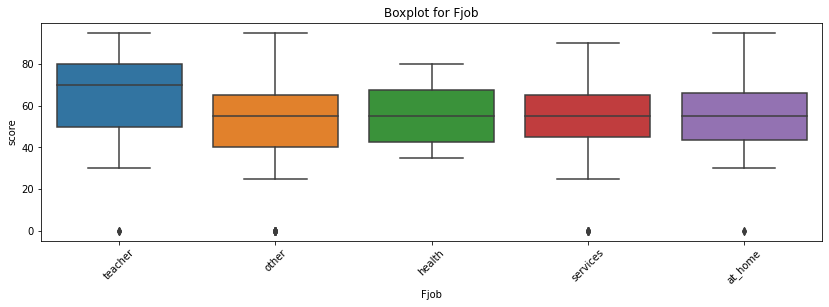

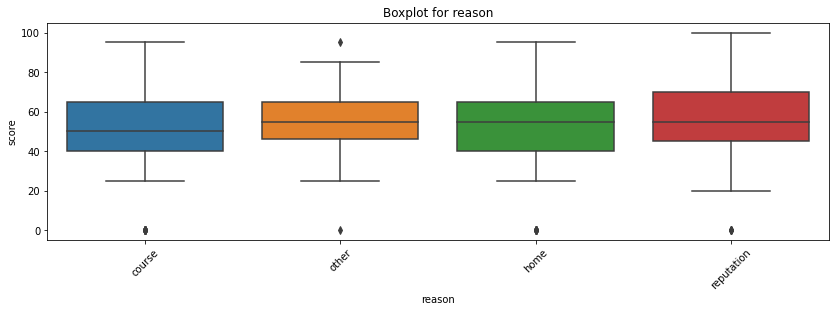

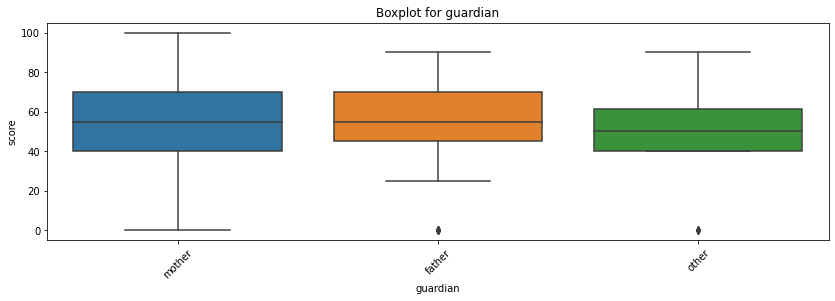

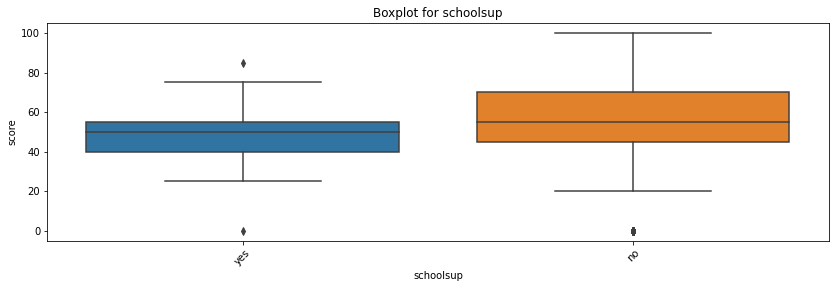

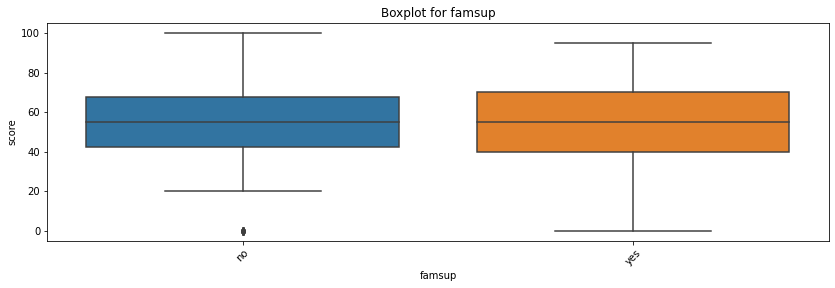

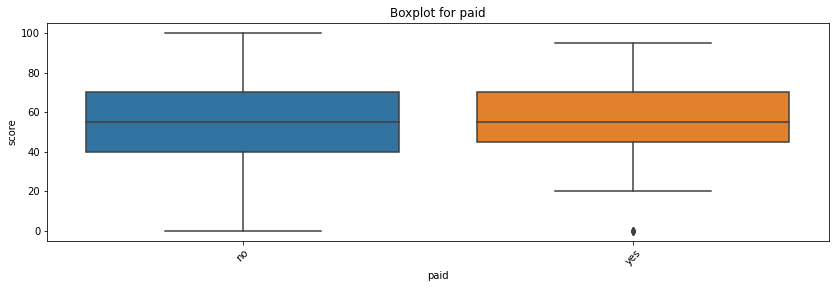

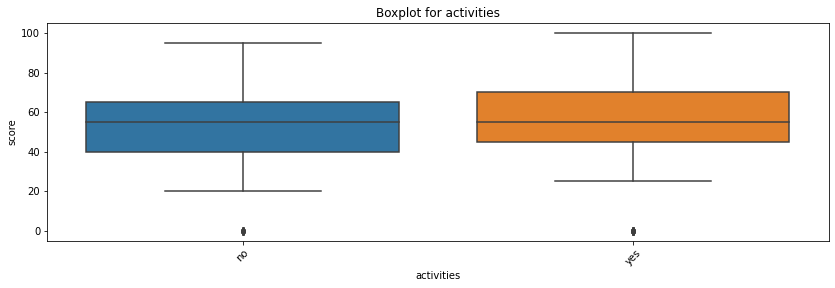

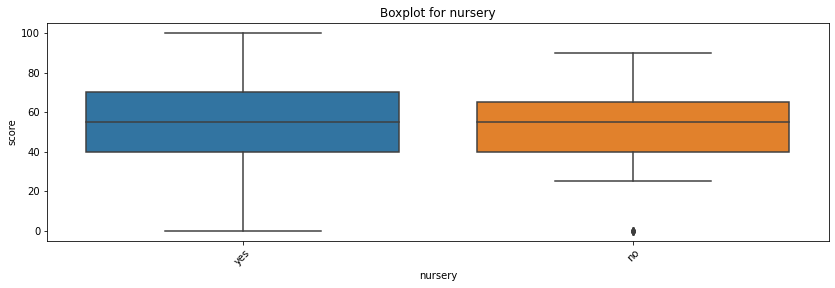

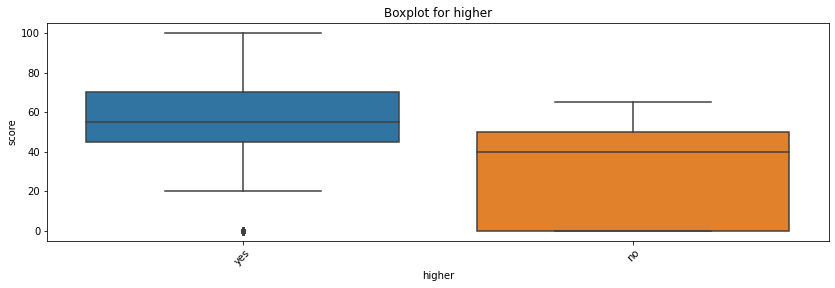

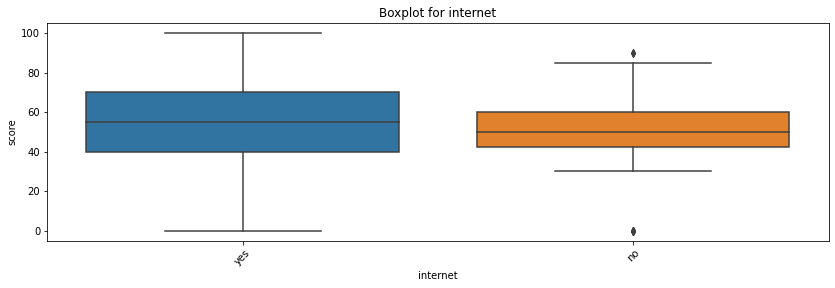

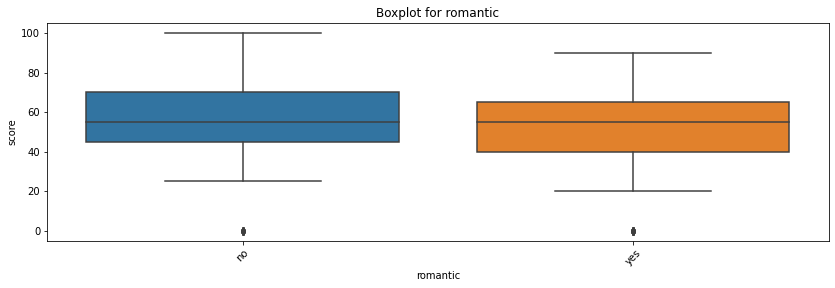

In [165]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=STUD.loc[STUD.loc[:, column].isin(STUD.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()




nom_cols = STUD.select_dtypes(exclude='number').columns 
for col in nom_cols:
    get_boxplot(col)



По графикам похоже, что все параметры,  могут влиять на оценку. 
Однако графики являются лишь вспомогательным инструментом,
настоящую значимость различий может помочь распознать статистика. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам,
с помощью теста Стьюдента.

In [174]:
def get_stat_dif(column):
    cols = STUD.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(STUD.loc[STUD.loc[:, column] == comb[0], 'score'],
                     STUD.loc[STUD.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [175]:
for col in STUD.select_dtypes(exclude='number').columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Данные достаточно чистые: 
количество пропущенных значений вырируется от 1% до 11% Есть 3 переменные данные по которым есть полностью . 
Ошибки обнаружены в F_edu family_rel 
переменная absences содержит 2 аномальных значения (рекомендуется поменять на медиану,
с целью сохранения информации в других предикторах.)
    Послед подробного осмотра принято решение:
удалить пропуски из целевой переменной за ненадобностью.
оставить значение 0 в score для выяснения возможности моделирования в этих случаях.
    В результате корреляционного анализа: 
обнаружена сильная обратная связь studytime и studytime_granular, второй удален за ненадобностью 
обнаружена линейная зависимость между F_edu M_edu которую можно использовать для создания нового
значимого признака и взаимного восстановления пропусков.
исключены переменные с коэффициенотом корреляции менее 0.1 по модулю как самые бесперсперктивные на этапе EDA
    Анализ номинативных и смешанных переменных с помощью boxplot  позволил выделить значимые признаки.

для моделирования рекомендуется использовать колонки 
'sex','failures', 'M_edu', 'M_job', 'age', 'go_out', 'study_time', 'F_edu', 'F_job'
                              'travel_time', 'health', 'absences', 'highter', 'romantic'
 эти данные представляют наибольший интерес.